In [23]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from google.colab import files
import matplotlib.pyplot as plt

In [24]:
!python --version

Python 3.7.12


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# covid1 = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
# covid1 = covid1[covid1['date'] == '2020-12-31']
# covid1 = covid1.drop(['date', 'county', 'state'], axis = 1)
# covid1 = covid1.dropna()
# covid1['fips'] = covid1['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

# covid2 = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
# covid2 = covid2[covid2['date'] == '2020-06-30']
# covid2 = covid2.drop(['date', 'county', 'state'], axis = 1)
# covid2 = covid2.dropna()
# covid2['fips'] = covid2['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

# covid = covid1.merge(covid2, on="fips")
# covid['cases'] = covid['cases_x'] - covid['cases_y']
# covid['deaths'] = covid['deaths_x'] - covid['deaths_y']
# covid = covid.drop(['cases_x', 'cases_y', 'deaths_x', 'deaths_y'], axis = 1)
# covid = covid.dropna()
# covid['fips'].nunique()

In [27]:
data = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/wave2_data.csv')

# data = data[['fips', 'popdense', 'population', 'ageab55', 'ageab65', 'ageab75', 'pctpov', 'pctmale', 'pctblack', 'pcthispanic', 'type', 'pct_highschool_or_less', 'no2', 'ozone', 'pm25', 'so2']]
# data['fips'] = data['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

# data = data.merge(covid, on='fips')
# data['cases rate 10k'] = data['cases'] / data['population'] * 10000
# data['deaths rate 10k'] = data['deaths'] / data['population'] * 10000
# data['deaths cases 10k'] = data['deaths'] / data['cases'] * 10000

# data[data['type'] == 0].to_csv('ZoneA_wave1.csv')
# data[data['type'] == 1].to_csv('ZoneB_wave1.csv')
cdata = data
# data.head()

cdata['ageab65'] = cdata['ageab65'] * 100
cdata['type'].value_counts()

1    76
0    42
Name: type, dtype: int64

### Viz

#### Correlation

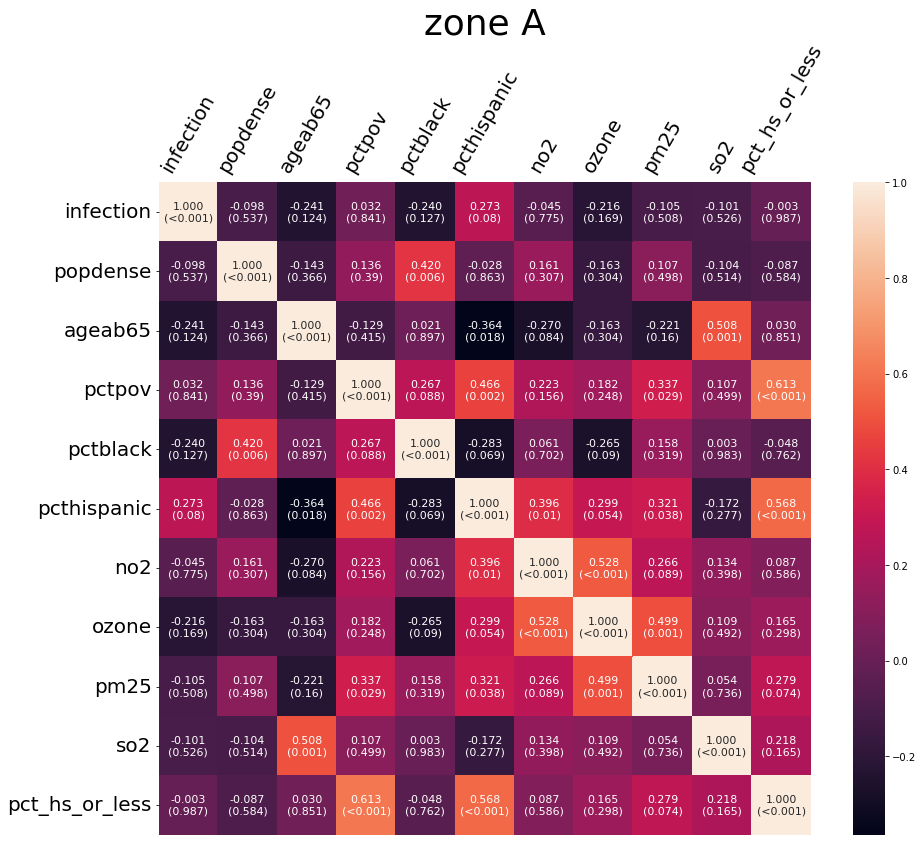

In [28]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 0]

df = rdata[['cases rate 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone A', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_infection_zoneA_wave2.svg", format="svg")
plt.savefig("corr_infection_zoneA_wave2.png")
# files.download("corr1.svg")
plt.show()

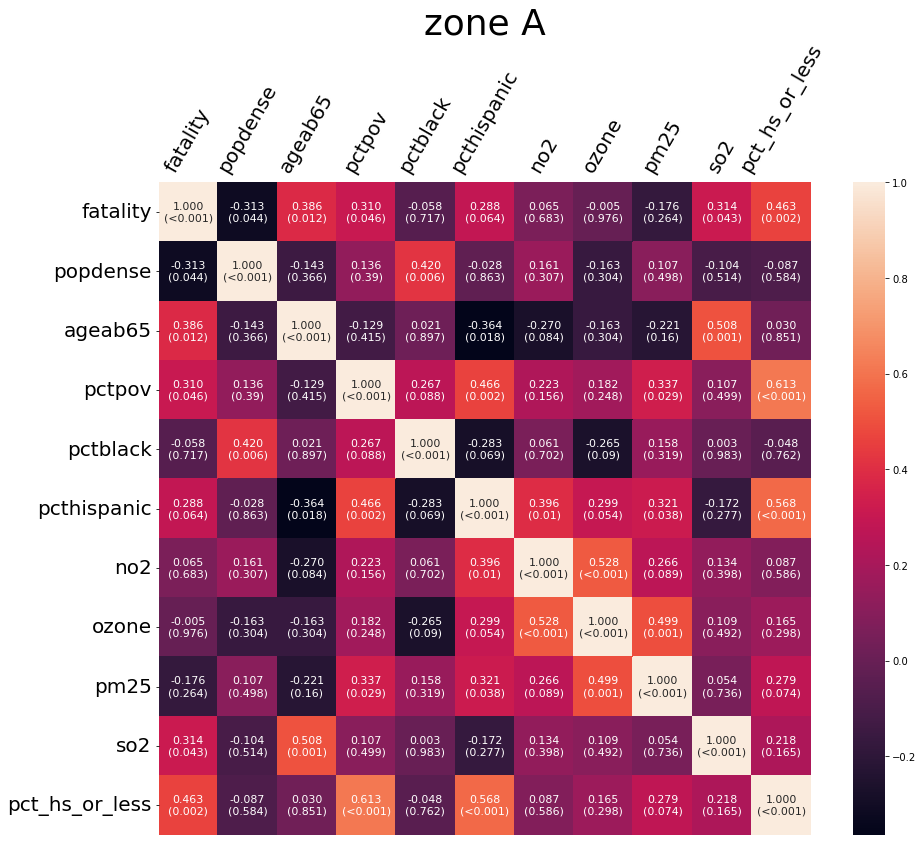

In [29]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 0]

df = rdata[['deaths cases 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone A', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_fatality_zoneA_wave2.svg", format="svg")
plt.savefig("corr_fatality_zoneA_wave2.png")
# files.download("corr1.svg")
plt.show()

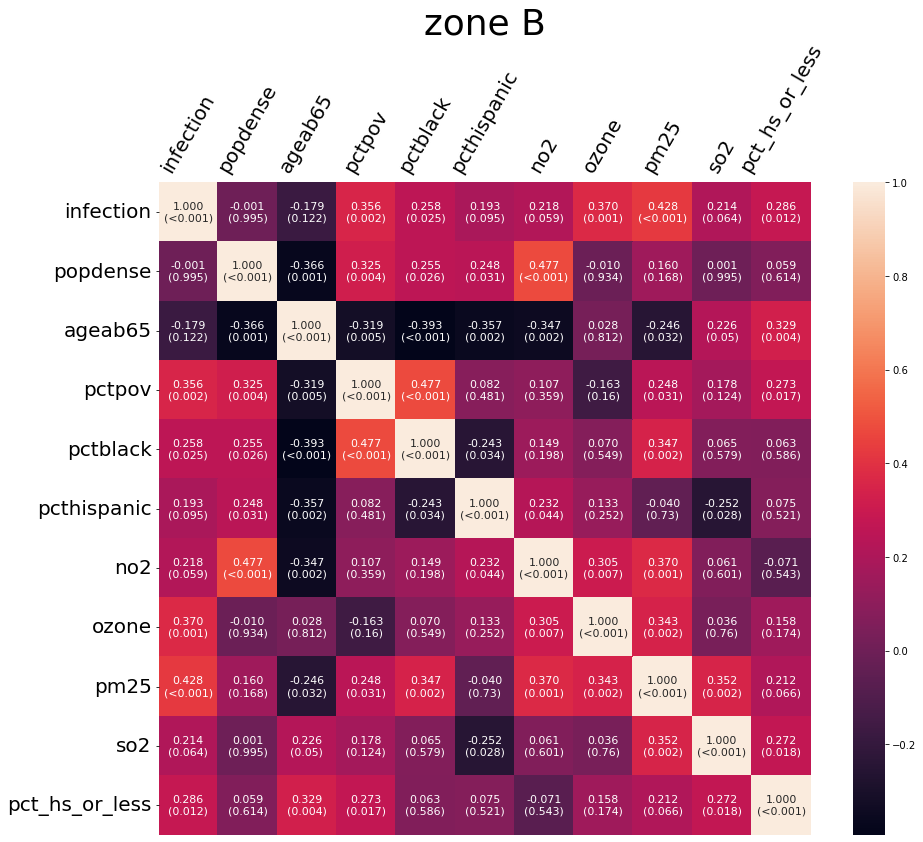

In [30]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 1]

df = rdata[['cases rate 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone B', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_infection_zoneB_wave2.svg", format="svg")
plt.savefig("corr_infection_zoneB_wave2.png")
# files.download("corr1.svg")
plt.show()

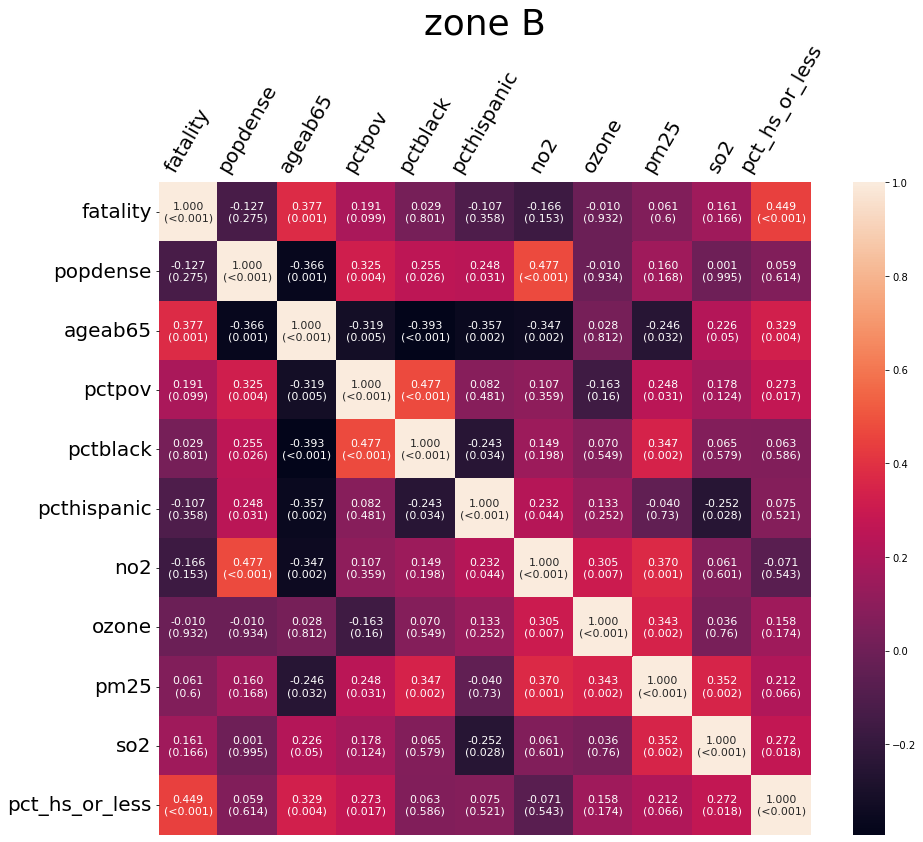

In [31]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 1]

df = rdata[['deaths cases 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone B', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_fatality_zoneB_wave2.svg", format="svg")
plt.savefig("corr_fatality_zoneB_wave2.png")
# files.download("corr1.svg")
plt.show()

#### Boxplot

popdense popdense Ttest_indResult(statistic=-2.586871239533693, pvalue=0.010920896087187514)
popdense popdensemean Zone A 364.5675401452381,mean Zone B 820.6473542236841
popdense popdensestd Zone A 337.30491939816153,std Zone B 1112.7898197253703
ageab65 ageab65 Ttest_indResult(statistic=-1.9912487568779766, pvalue=0.04880379204141728)
ageab65 ageab65mean Zone A 14.449776944055895,mean Zone B 15.468785305911073
ageab65 ageab65std Zone A 2.367010048164405,std Zone B 2.8096135802732
pctpov pctpov Ttest_indResult(statistic=1.9234621934438285, pvalue=0.056872787585152046)
pctpov pctpovmean Zone A 15.23809523809524,mean Zone B 13.626315789473686
pctpov pctpovstd Zone A 4.188657878124778,std Zone B 4.448231661265035
pctblack pctblack Ttest_indResult(statistic=-1.4704655529986062, pvalue=0.14414303009723498)
pctblack pctblackmean Zone A 13.773472989523814,mean Zone B 18.016524358815786
pctblack pctblackstd Zone A 12.10583211736272,std Zone B 16.378104352935654
pcthispanic pcthispanic Ttest_in

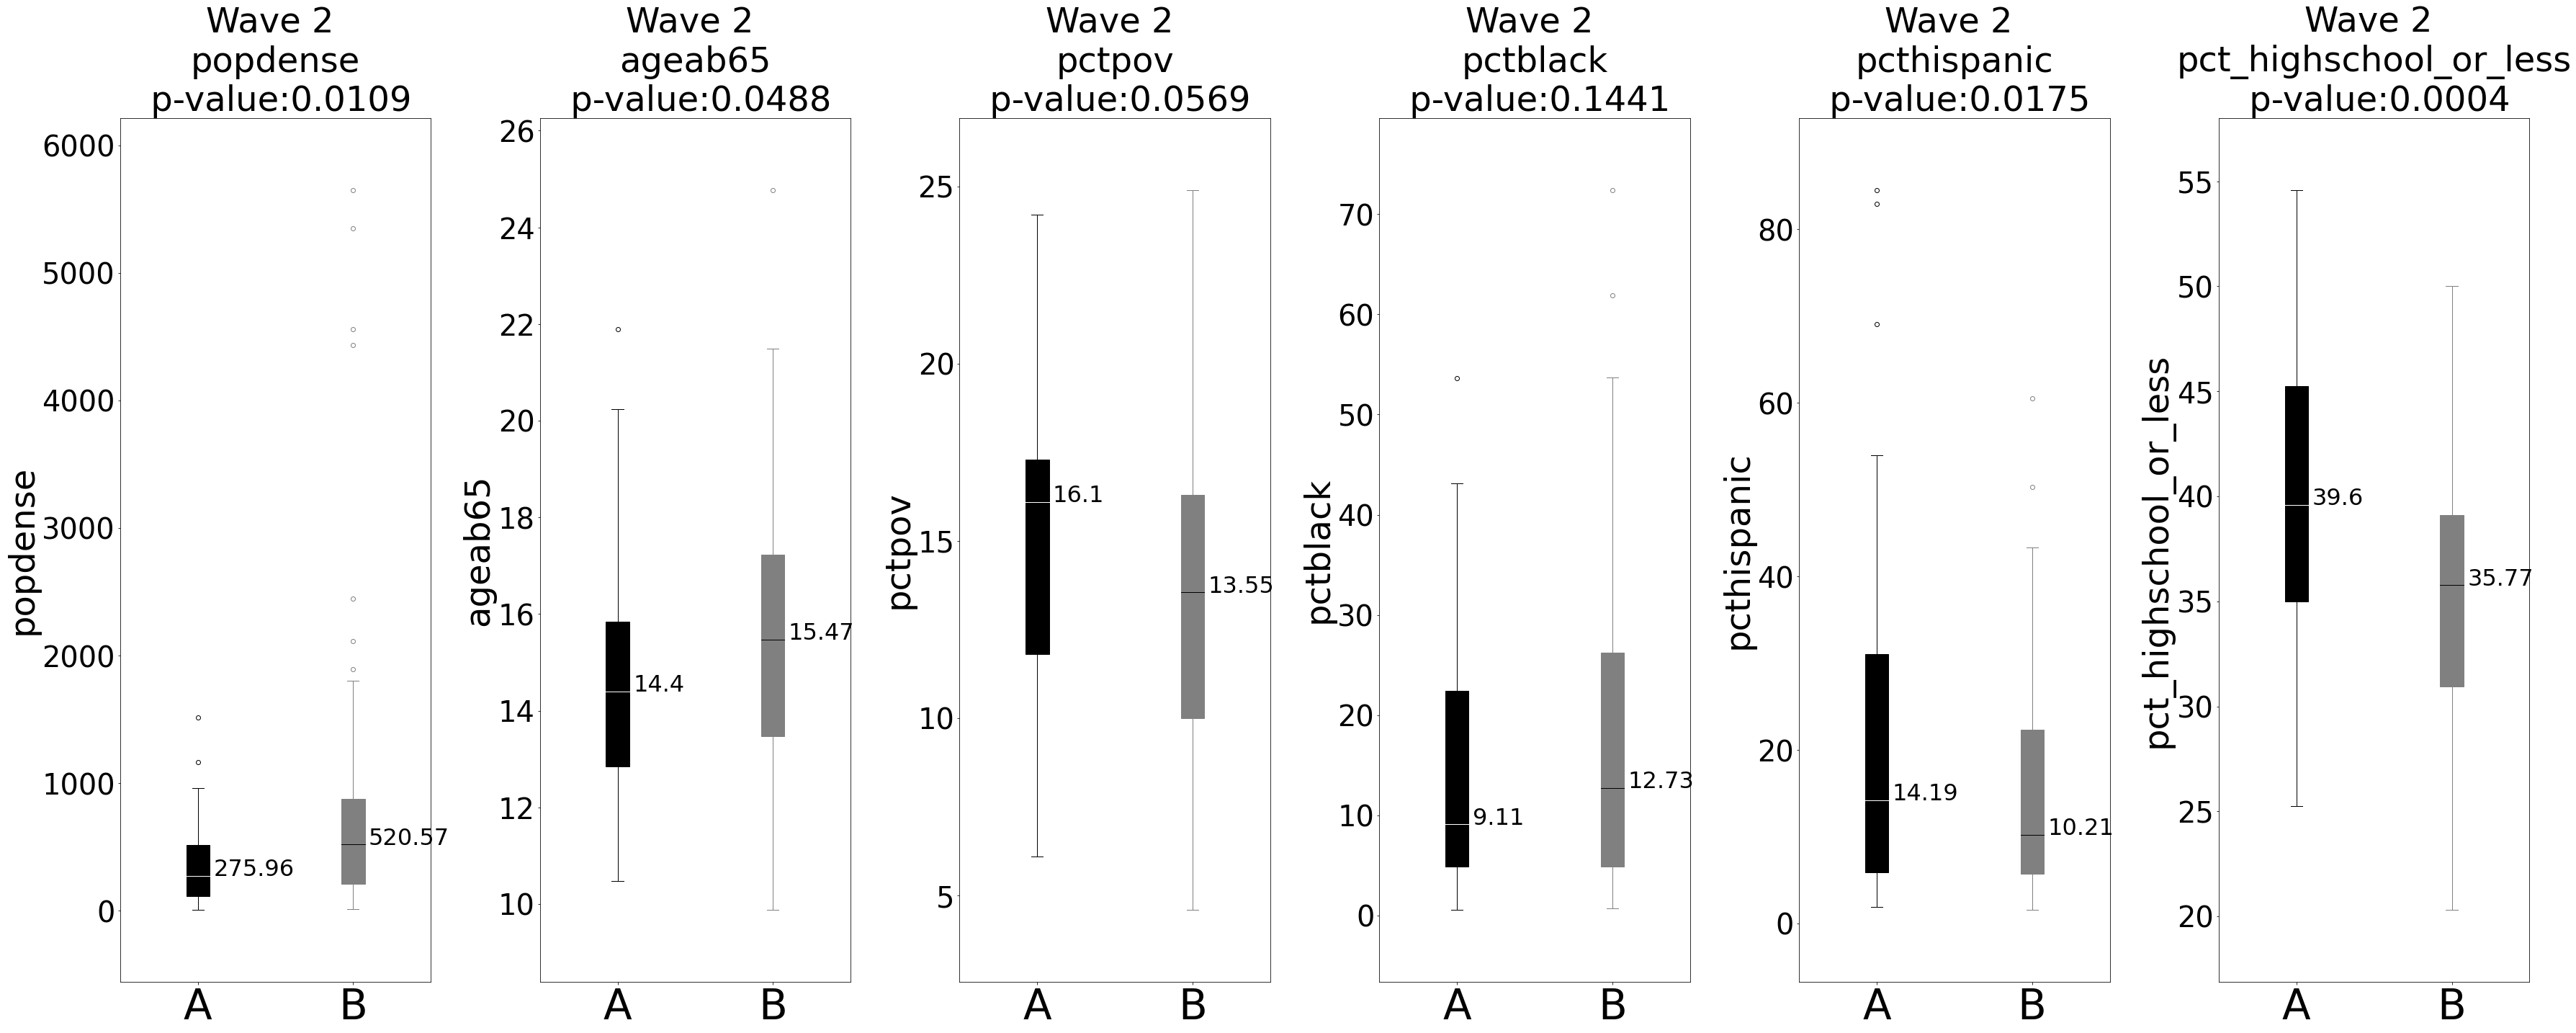

In [32]:
stats_result = pd.DataFrame(columns=['Name', 'T-test Statistics', 'T-Test p-value', 'Mann-Whitney U test Statistics', 'Mann-Whitney U test p-value'])

rdata = cdata.copy() 

rindex = [1, 2, 3, 4, 5, 6]
region = ['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'pct_highschool_or_less']

fig, ax = plt.subplots(1, 6,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 2 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)
  
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para, 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.tight_layout(pad=1.0)
plt.savefig("demo_wave2.svg", format="svg")

no2 no2 Ttest_indResult(statistic=1.2760743869062006, pvalue=0.20447835654855454)
no2 no2mean Zone A 20.36684002385452,mean Zone B 18.68624224547169
no2 no2std Zone A 6.770782476631574,std Zone B 6.892621538531492
ozone ozone Ttest_indResult(statistic=2.1600423328620106, pvalue=0.032826950802209)
ozone ozonemean Zone A 0.0478391450485194,mean Zone B 0.04600840598528372
ozone ozonestd Zone A 0.004767586453105234,std Zone B 0.004198641130803131
pm25 pm25 Ttest_indResult(statistic=1.8642057509532428, pvalue=0.0648208789889026)
pm25 pm25mean Zone A 8.315713919632199,mean Zone B 7.7644992724913235
pm25 pm25std Zone A 1.6979648179884468,std Zone B 1.4428479804602323
so2 so2 Ttest_indResult(statistic=0.8265868072098038, pvalue=0.41016829498572693)
so2 so2mean Zone A 1.8950043992771122,mean Zone B 1.5975890114507307
so2 so2std Zone A 2.7639247935166416,std Zone B 1.1137637433179883


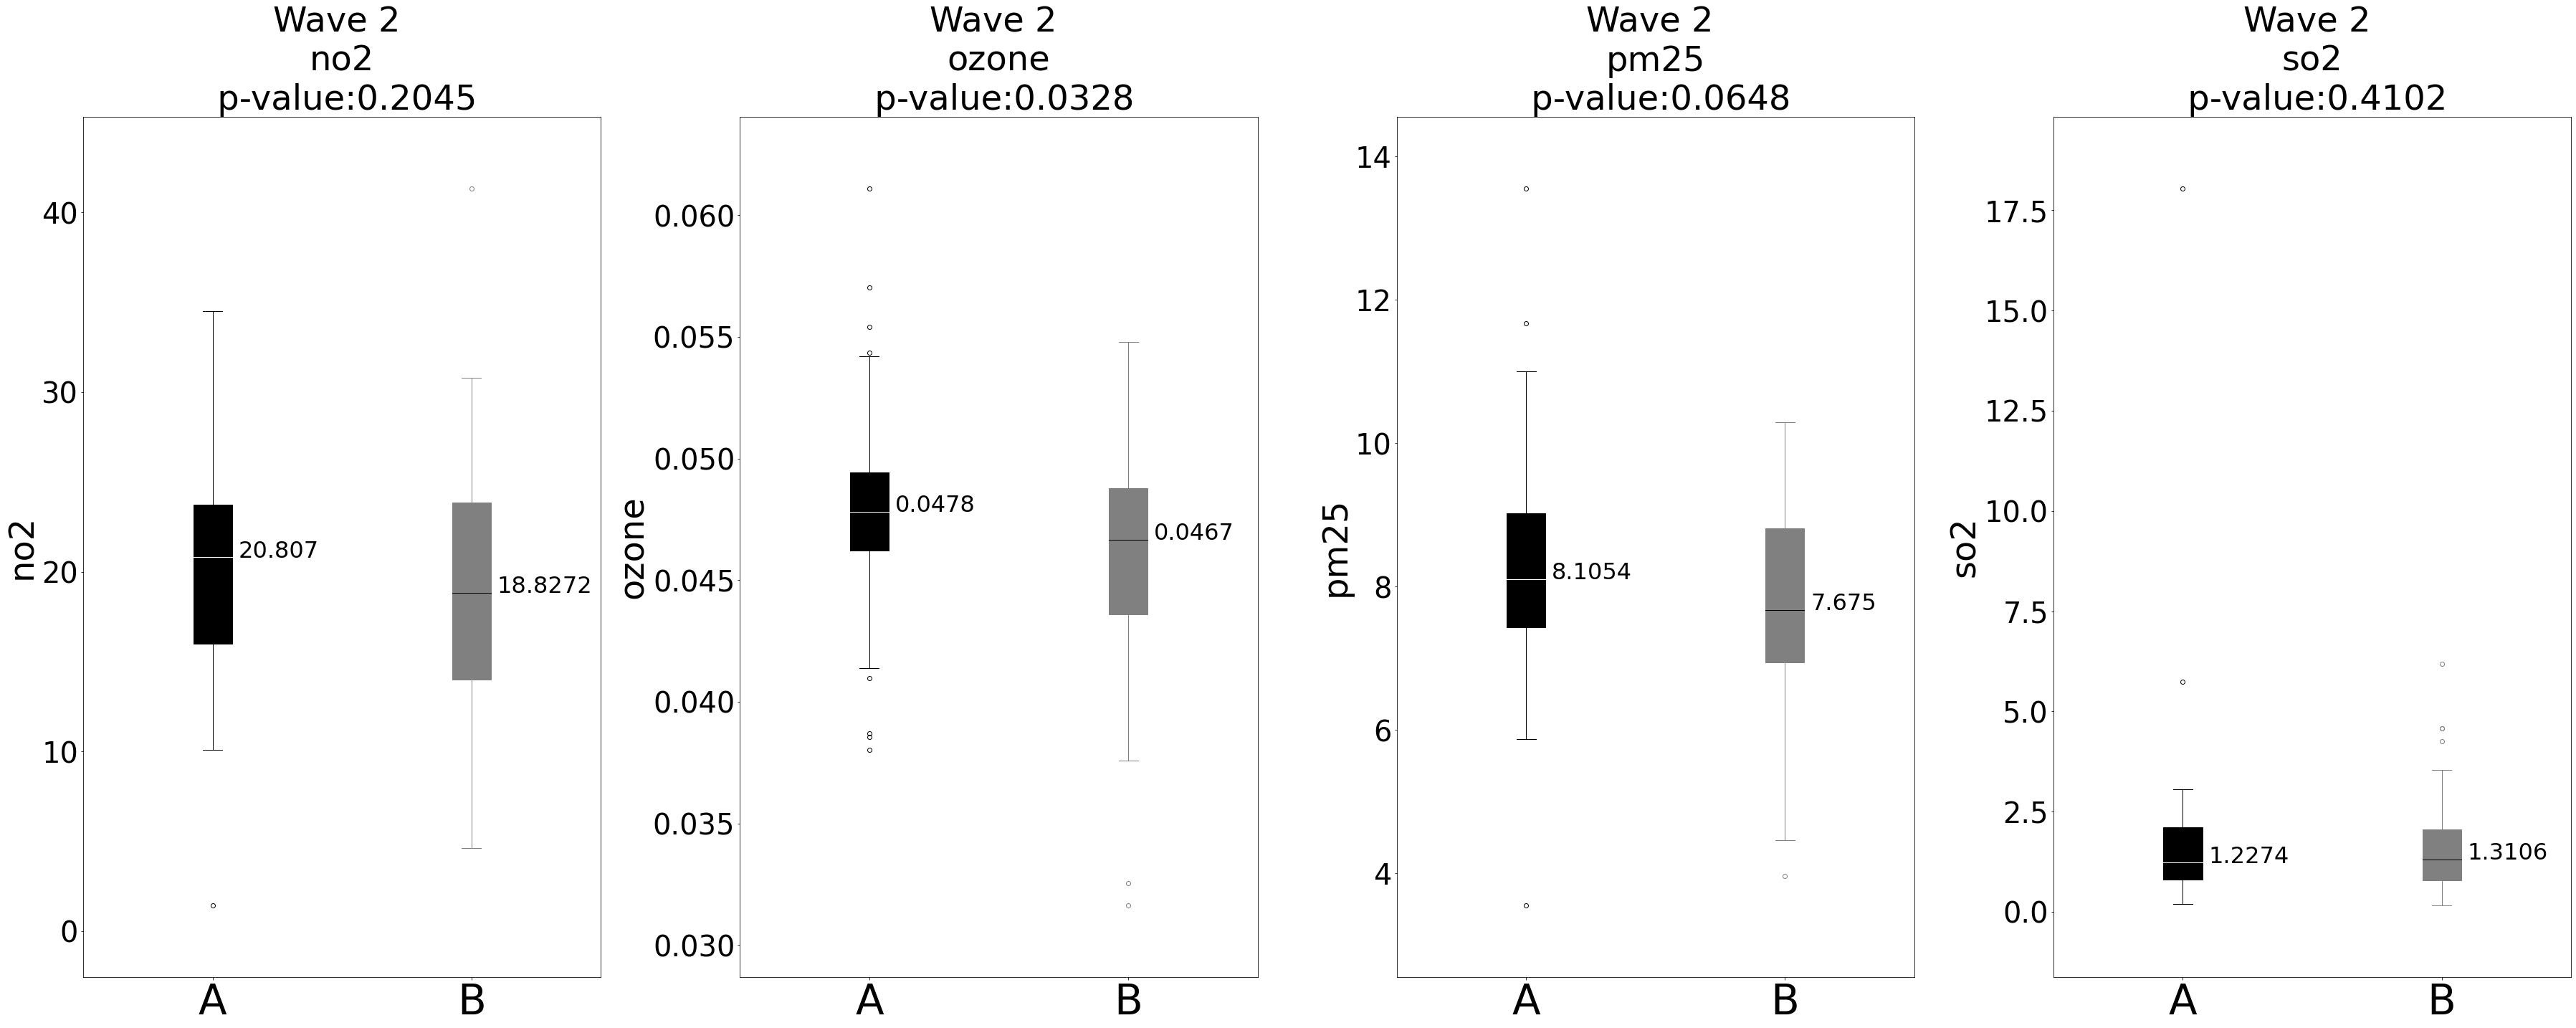

In [33]:
rdata = cdata.copy() 

rindex = [1, 2, 3, 4]
region = ['no2', 'ozone', 'pm25', 'so2']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 2 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)
  
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para, 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.tight_layout(pad=1.0)
plt.savefig("pollutant_wave2.svg", format="svg")

In [34]:
stats_result.to_csv('t-test_wave2.csv')

### MLR Infection

In [35]:
rdata = cdata.copy()

In [36]:
rdata.columns

Index(['Unnamed: 0', 'fips', 'cases', 'deaths', 'popdense', 'population',
       'ageab55', 'ageab65', 'AR', 'AS', 'AT', 'AU', 'pct_highschool_or_less',
       'cases rate 10k', 'deaths rate 10k', 'deaths cases 10k', 'pctpov',
       'pctmale', 'pctwhite', 'pctblack', 'pctindian', 'pctasian',
       'pcthispanic', 'type', 'ozone', 'pm25', 'no2', 'so2'],
      dtype='object')

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
rdata['cases rate 10k'] = np.log(rdata['cases rate 10k'])
rdata['deaths cases 10k'] = np.log(rdata['deaths cases 10k'])

#### Zone A All

In [39]:
A = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
A = sm.add_constant(A)
print("Zone A")
calc_vif(A)

Zone A


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variables,VIF
0,const,261.920296
1,popdense,1.342080
2,ageab65,1.745261
3,pctpov,2.232931
4,pctblack,2.317443
5,pcthispanic,3.428508
6,no2,2.406933
7,ozone,2.530527
8,pm25,1.877761
9,so2,1.902046


In [40]:
import statsmodels.api as sm

X = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 0][['cases rate 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('7-12_infect_zoneA_all.csv')

                            OLS Regression Results                            
Dep. Variable:         cases rate 10k   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.357
Date:                Sat, 19 Mar 2022   Prob (F-statistic):              0.246
Time:                        23:59:23   Log-Likelihood:                 26.499
No. Observations:                  42   AIC:                            -31.00
Df Residuals:                      31   BIC:                            -11.88
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
X = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 0][['deaths cases 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('7-12_fatal_zoneA_all.csv')

                            OLS Regression Results                            
Dep. Variable:       deaths cases 10k   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     4.245
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           0.000907
Time:                        23:59:23   Log-Likelihood:                 5.5693
No. Observations:                  42   AIC:                             10.86
Df Residuals:                      31   BIC:                             29.98
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Zone B All

In [42]:
A = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
A = sm.add_constant(A)
print("Zone B")
calc_vif(A)

Zone B


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variables,VIF
0,const,220.584026
1,popdense,1.575156
2,ageab65,2.627732
3,pctpov,1.811798
4,pctblack,2.082216
5,pcthispanic,1.928765
6,no2,1.723933
7,ozone,1.472544
8,pm25,1.800073
9,so2,1.424942


In [43]:
X = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 1]['cases rate 10k']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('7-12_infect_zoneB_all.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         cases rate 10k   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     5.872
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           2.99e-06
Time:                        23:59:24   Log-Likelihood:                -2.6849
No. Observations:                  76   AIC:                             27.37
Df Residuals:                      65   BIC:                             53.01
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [44]:
X = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 1]['deaths cases 10k']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('7-12_fatal_zoneB_all.csv')

                            OLS Regression Results                            
Dep. Variable:       deaths cases 10k   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     2.637
Date:                Sat, 19 Mar 2022   Prob (F-statistic):            0.00924
Time:                        23:59:24   Log-Likelihood:                -15.041
No. Observations:                  76   AIC:                             52.08
Df Residuals:                      65   BIC:                             77.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
